In [6]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(dplyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [10]:
player <- read_csv("/home/jovyan/work/individual project/players.csv")
player

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


In [5]:
glimpse(player)

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


In [6]:
summary(player)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               

In [7]:
player <- player |>
        filter(!is.na(Age))

In [8]:
glimpse(player)

Rows: 194
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


In [8]:
player <- player |>
  mutate(sub = ifelse(subscribe == TRUE, 1, 0))

glimpse(player)

Rows: 196
Columns: 8
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…
$ sub          <dbl> 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, …


In [10]:
table(player$experience)


 Amateur Beginner      Pro  Regular  Veteran 
      63       35       13       35       48 

In [11]:
# Define ranking for experience levels
player <- player |>
  mutate(experience_level = case_when(
    experience == "Beginner" ~ 1,
    experience == "Amateur" ~ 2,
    experience == "Regular" ~ 3,
    experience == "Veteran" ~ 4,
    experience == "Pro" ~ 5,
    TRUE ~ NA_real_  # Assign NA if no match
  ))
# Check the updated data
glimpse(player)

Rows: 194
Columns: 9
$ experience       <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "A…
$ subscribe        <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRU…
$ hashedEmail      <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee97…
$ played_hours     <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.…
$ name             <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Ad…
$ gender           <chr> "Male", "Male", "Male", "Female", "Male", "Female", "…
$ Age              <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22…
$ sub              <dbl> 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,…
$ experience_level <dbl> 5, 4, 4, 2, 3, 2, 3, 2, 2, 4, 4, 5, 1, 2, 4, 2, 1, 2,…


In [17]:
# Compute mean with 3 decimal places
summary_table2 <- player |>
  summarise(across(where(is.numeric), ~ round(mean(.x, na.rm = TRUE), 3)))

# Print in default R format
print(summary_table2)

# A tibble: 1 × 4
  played_hours   Age   sub experience_level
         <dbl> <dbl> <dbl>            <dbl>
1         5.90  20.5 0.732             2.70


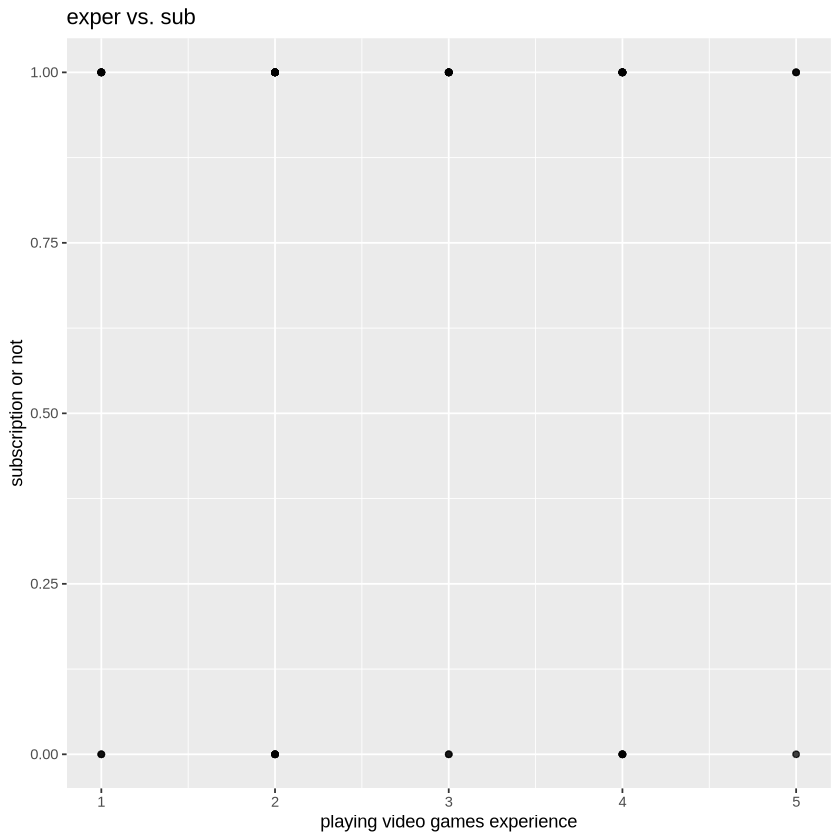

In [12]:
plot1 <- player |>
   ggplot(aes(x = experience_level, y =  sub)) + 
       geom_point(alpha = 0.3) + # Deals with the transparency of the points, set it to an appropiate value
       xlab("playing video games experience") +
       ylab("subscription or not") +
       ggtitle("exper vs. sub")
# No Answer - remove if you provide an answer
plot1

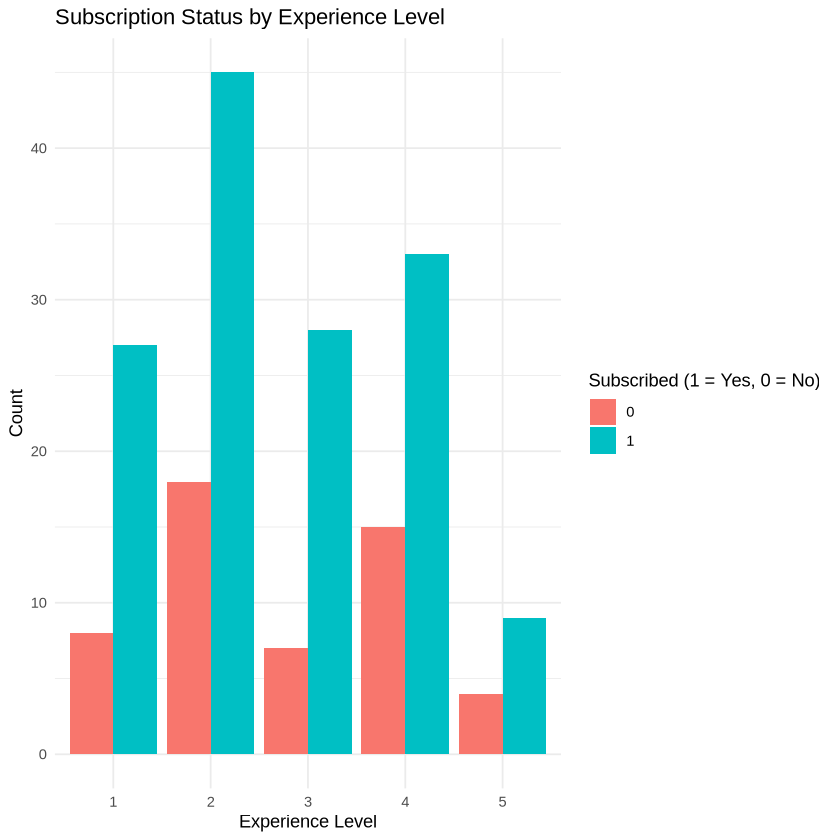

In [13]:
# Plot subscription count by experience level
ggplot(player, aes(x = factor(experience_level), fill = factor(sub))) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription Status by Experience Level",
       x = "Experience Level",
       y = "Count",
       fill = "Subscribed (1 = Yes, 0 = No)") +
  theme_minimal()

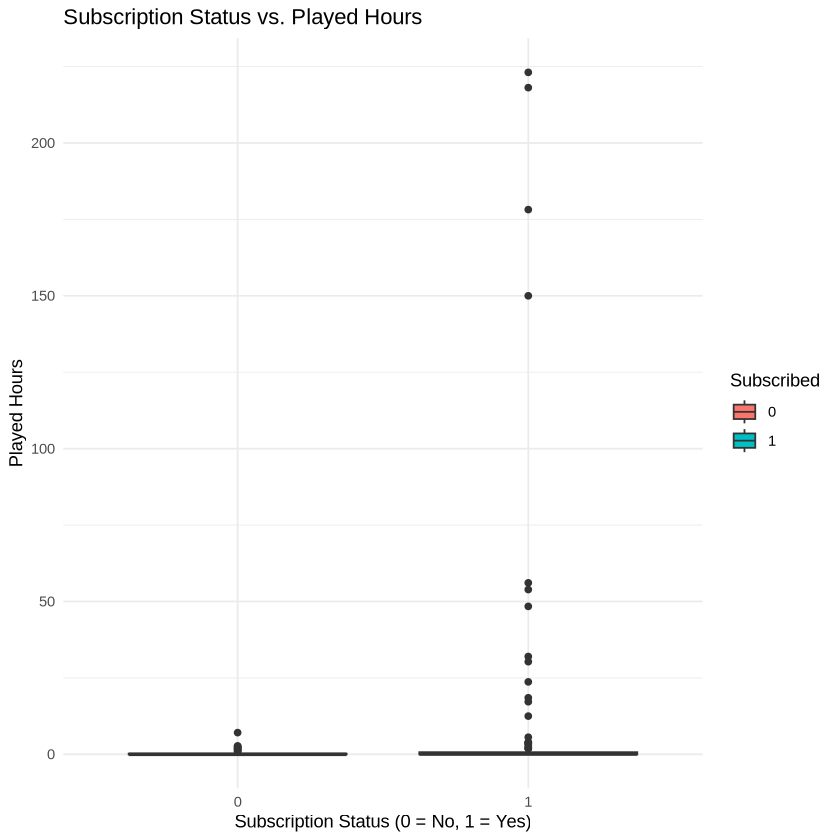

In [14]:
ggplot(player, aes(x = factor(sub), y = played_hours, fill = factor(sub))) +
  geom_boxplot() +
  labs(title = "Subscription Status vs. Played Hours",
       x = "Subscription Status (0 = No, 1 = Yes)",
       y = "Played Hours",
       fill = "Subscribed") +
  theme_minimal()

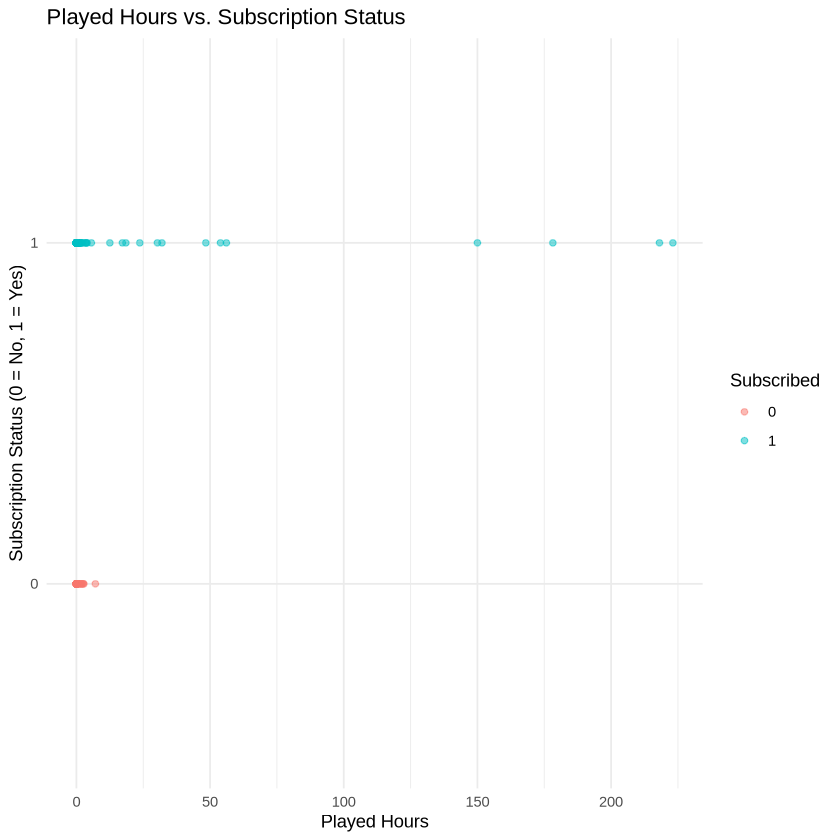

In [15]:
ggplot(player, aes(x = played_hours, y = factor(sub), color = factor(sub))) +
  geom_point(alpha = 0.5) +
  labs(title = "Played Hours vs. Subscription Status",
       x = "Played Hours",
       y = "Subscription Status (0 = No, 1 = Yes)",
       color = "Subscribed") +
  theme_minimal()

In [16]:
summary(player)

  experience        subscribe       hashedEmail         played_hours    
 Length:194         Mode :logical   Length:194         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :142       Mode  :character   Median :  0.100  
                                                       Mean   :  5.905  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
     name              gender               Age             sub       
 Length:194         Length:194         Min.   : 8.00   Min.   :0.000  
 Class :character   Class :character   1st Qu.:17.00   1st Qu.:0.000  
 Mode  :character   Mode  :character   Median :19.00   Median :1.000  
                                       Mean   :20.52   Mean   :0.732  
                                       3rd Qu.:22.00   3rd Qu.:1.000  
                                       Max.   :50.00   Max.   :

  The dataset is made up of two csv files: players.csv and session.csv. The research group of PLAICraft records players' engagement, demographics, and subscription behaviours. Players.csv contains 196 observations and 7 variables, including:
1)"experience": categorical, the level of the player based on how long the players have played the game,
2)"subscribe": logical, the subscription status of the player, 
3)"hashedEmail": categorical, the player's email address, 
4)"played_hours": numeric, how long does the player played the game, 
5)"name": categorical, player's name, 
6)"gender": categorical, player's gender, 
7)"Age": numeric, player's age.
  Neither "experience" nor "subscribe" are numeric, I convert them into numeric variables("experience_level" and "sub") so I can explore the relationships between "experience", "played_hours", and "subscribe". 


-Broad question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
-Specific question: Can "played_hours" predict "subscribe" in players.csv?
  The data will help answer this question by comparing playtime and experience trends across subscribed and non-subscribed players, following with preprocessing and analyzing played_hours and experience as explanatory variables and subscribe as the response variable. 
  First, I load players.csv into R and cleaning the missing values of "Age". Then I convert "experience" and "subscribe" into numeric variables "experience level" and "sub" for graphing. After computing mean values of the variables, I try with a scatterplot (plot1) to see if there is a relationship between "experience" and "sub". Unfortunately, the graph doesn't show properly. So I try with bar graph and differentiate subscribers and non-subscribers. This time we can tell that most of the subscribers are "Amateur", which means "experience" is not the factor of "subscribe". Then I plot a box plot and a scatterplot about "played_hours" and "sub". Both graph show that longer play hours leads to more likelihood of subscription.


The mean values of the 4 variables:
1)played_hours: 5.90 hrs.
2)Age: 20.5 years old.
3)sub: 73.2%.
4)experience_level: 2.70 -> amateur.
The mean values of these variables help in understanding overall player behavior patterns and their relationship with subscription status.


I plan to use K-NN classification to predict whether played_hours will affect subscribe. K-NN classification is an algorithm used to categorize data points based on the majority of the class of their nearest neighbours. Since it is unsure whether the relationship between played_hours and subscribe will be linear, and the responce variable "subscribe" is categorical, K-NN classification works the best. In this case, I assume that (1) the data is scaled, (2) experienced players are more likely to subscribe, (3) the longer the player spend on the game, the more likely the player will subscribe. However, K-NN classifacation requires appropriate k-values for estimating and prediction, as small k-values leads to overfitting and large k-values reduce accuracy. So, I will normalize and split the data into a training set and a testing set. Use cross-validation to find the optimal k-value to make predictions.